## Sample 7.2 Hierarchical Model: measuring radial velocoty of a star from various spectral lines

In [1]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
import scipy.special as special

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

(4000.0, 9000.0)

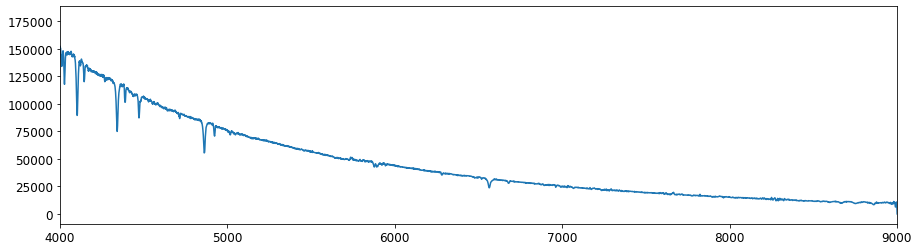

In [2]:
# measure the redshift from an absorption line
filename = '351110104.fits'
tchfits = fits.open(filename)
log_wv0 = tchfits[0].header['CRVAL1']
log_dwv = tchfits[0].header['CD1_1']

sp = tchfits[0].data

N = len(sp[0,:])
wv = 10**(log_wv0+np.arange(0,N,1)*log_dwv)

fig = plt.figure(figsize=[15,4])
ax = fig.add_subplot(111)
ax.plot(wv,sp[0,:])
ax.set_xlim([4000,9000])
# fig.show()


mean vel = -12.260+/-2.298

mean vel = -4.684+/-0.758

mean vel = -10.180+/-2.450

mean vel = -12.990+/-1.813


(-30.0, 20.0)

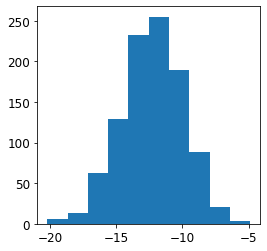

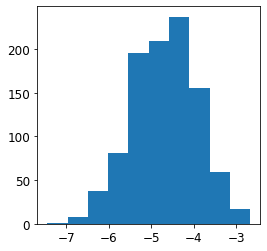

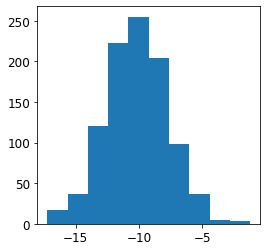

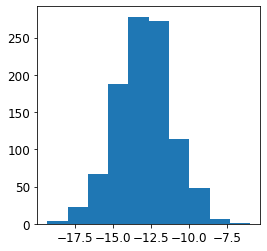

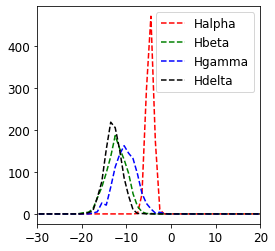

In [6]:
Ha_0 = 6564.6
Hb_0 = 4862.71
Hg_0 = 4341.69
Hd_0 = 4102.89

Ha_cont = [6420.00,6455.00,6600.00,6640.00]
Hb_cont = [4823.875,4847.875,4876.625,4891.625]
Hg_cont = [4283.50,4319.75,4367.25,4419.75]
Hd_cont = [4041.60,4079.75,4128.50,4161.00]

def normSpec(wv,sp,cont):
    ind_cont1 = (wv>=cont[0]) & (wv<=cont[1])
    ind_cont2 = (wv>=cont[2]) & (wv<=cont[3])
    fc1 = np.mean(sp[ind_cont1])
    wv1 = np.mean(wv[ind_cont1])
    fc2 = np.mean(sp[ind_cont2])
    wv2 = np.mean(wv[ind_cont2])
    fc = (fc2-fc1)/(wv2-wv1)*(wv-wv1)+fc1
    normsp = sp/fc
    return normsp

def gauss(x,A,mu,sig):
    return 1.-A*np.exp(-(x-mu)**2/(2*sig**2))

#normalize Halpha
normsp_Ha = normSpec(wv,sp[0,:],Ha_cont)
ind_Ha = (wv>=Ha_cont[0]) & (wv<=Ha_cont[3])
normsp_Ha = normsp_Ha[ind_Ha]
wv_Ha = wv[ind_Ha]
#normalize Hbeta
normsp_Hb = normSpec(wv,sp[0,:],Hb_cont)
ind_Hb = (wv>=Hb_cont[0]) & (wv<=Hb_cont[3])
normsp_Hb = normsp_Hb[ind_Hb]
wv_Hb = wv[ind_Hb]
#normalize Hgamma
normsp_Hg = normSpec(wv,sp[0,:],Hg_cont)
ind_Hg = (wv>=Hg_cont[0]) & (wv<=Hg_cont[3])
normsp_Hg = normsp_Hg[ind_Hg]
wv_Hg = wv[ind_Hg]
#normalize Hdelta
normsp_Hd = normSpec(wv,sp[0,:],Hd_cont)
ind_Hd = (wv>=Hd_cont[0]) & (wv<=Hd_cont[3])
normsp_Hd = normsp_Hd[ind_Hd]
wv_Hd = wv[ind_Hd]

#random sampling for Hbeta

y = 1.-normsp_Hb[(wv_Hb>4840.)]
x = wv_Hb[(wv_Hb>4840.)]
#y = 1.-normsp_Hb[(wv_Hb>4852.) & (wv_Hb<4872)]
#x = wv_Hb[((wv_Hb>4852.) & (wv_Hb<4872))]
N = 100000

M = 1000
vlos_mc_Hb = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)
    x_s = x_s0[ind_acc]
    vlos_mc_Hb[m] = (np.mean(x_s)-Hb_0)/Hb_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc_Hb,10)
# fig.show()
print('\nmean vel = %(m).3f+/-%(d).3f' % \
    {'m': np.mean(vlos_mc_Hb), 'd': np.std(vlos_mc_Hb)})

#random sampling for Halpha

#y = 1.-normsp_Ha[(wv_Ha>6535.) & (wv_Ha<6600.)]
#x = wv_Ha[(wv_Ha>6535.) & (wv_Ha<6600.)]
y = 1.-normsp_Ha[(wv_Ha>6555.) & (wv_Ha<6575.)]
x = wv_Ha[(wv_Ha>6555.) & (wv_Ha<6575.)]
N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)
    x_s = x_s0[ind_acc]
    vlos_mc[m] = (np.mean(x_s)-Ha_0)/Ha_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
# fig.show()
print('\nmean vel = %(m).3f+/-%(d).3f' %\
    {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)})
vlos_mc_Ha = vlos_mc

#random sampling for Hgamma

y = 1.-normsp_Hg[(wv_Hg<4370.) &(wv_Hg>4320.)]
x = wv_Hg[(wv_Hg<4370.) &(wv_Hg>4320.)]
#y = 1.-normsp_Hg[(wv_Hg<4351.) &(wv_Hg>4331.)]
#x = wv_Hg[(wv_Hg<4351.) &(wv_Hg>4331.)]
N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)
    x_s = x_s0[ind_acc]
    vlos_mc[m] = (np.mean(x_s)-Hg_0)/Hg_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
# fig.show()
print('\nmean vel = %(m).3f+/-%(d).3f' %\
    {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)})
vlos_mc_Hg = vlos_mc

#random sampling for Hdelta

y = 1.-normsp_Hd[(wv_Hd<4119.) & (wv_Hd>4080.)]
x = wv_Hd[(wv_Hd<4119.) & (wv_Hd>4080.)]
#y = 1.-normsp_Hd[(wv_Hd<4112.) & (wv_Hd>4092.)]
#x = wv_Hd[(wv_Hd<4112.) & (wv_Hd>4092.)]

N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)
    x_s = x_s0[ind_acc]
    vlos_mc[m] = (np.mean(x_s)-Hd_0)/Hd_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
# fig.show()
print('\nmean vel = %(m).3f+/-%(d).3f' % \
    {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)})
vlos_mc_Hd = vlos_mc

vgrid = np.arange(-200,200,1)
vcenter = (vgrid[1:]+vgrid[0:-1])/2.
h_Ha,xedge = np.histogram(vlos_mc_Ha, vgrid)
h_Hb,xedge = np.histogram(vlos_mc_Hb, vgrid)
h_Hg,xedge = np.histogram(vlos_mc_Hg, vgrid)
h_Hd,xedge = np.histogram(vlos_mc_Hd, vgrid)


fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
pa, = ax.plot(vcenter,h_Ha,'r--',label='Halpha')
pb, = ax.plot(vcenter,h_Hb,'g--',label='Hbeta')
pg, = ax.plot(vcenter,h_Hg,'b--',label='Hgamma')
pd, = ax.plot(vcenter,h_Hd,'k--',label='Hdelta')
ax.legend([pa,pb,pg,pd],\
           ['Halpha','Hbeta','Hgamma','Hdelta'],fontsize=12)
ax.set_xlim((-30,20))
# fig.show()

In [7]:
#prior of tau, non-informative prior used here
def prior_tau(tau):
    return 1#/tau**2

#posterior of tau given y, in logarithmic form
def lnpost_tau_y(tau, y_bar, sigma2, J):
    lnp = np.zeros(np.shape(tau))
    for i in range(len(tau)):
        inv_s2 = 1/(sigma2+tau[i]**2)
        mu_hat = np.sum(y_bar*inv_s2)/np.sum(inv_s2)
        V_mu = 1/np.sum(inv_s2)
        lnp[i] = prior_tau(tau[i])+0.5*np.log(V_mu)
        #print inv_s2,mu_hat,V_mu,lnp[i]
        if J>1:
            for j in range(J):
                lnp[i] += 0.5*np.log(inv_s2[j])-\
                    0.5*(y_bar[j]-mu_hat)**2*inv_s2[j]
        else:
            lnp[i] += 0.5*np.log(inv_s2)-\
                0.5*(y_bar-mu_hat)**2*inv_s2
        #print 0.5*np.log(inv_s2)-\
         #       0.5*(y_bar-mu_hat)**2*inv_s2
    return lnp

def draw_tau(y_bar, sigma2, J, N=10000, \
             xmin=0,xmax=40,ymin=0,ymax=0.006, dy=0):
    x = []
    k = 0
    m = 0
    while k<N and m <= 3:
        x0 = np.random.uniform(low=xmin,high=xmax,size=N*20)
        y0 = np.log(np.random.uniform(low=ymin,\
                    high=ymax,size=N*20))
        y1 = lnpost_tau_y(x0,y_bar,sigma2,J)-dy
        
        ind = (y0<y1)
        x.append(x0[ind])
        k = k + np.sum(ind)
        m += 1
        #print k,m
    xx = np.array(x).reshape((k,1))
    
    return (xx[0:N])

#draw mu from its conditional posterior given tau and y
def draw_condpost_mu(y_bar, sigma2, tau, N):
    mu = np.zeros(np.shape(tau))
    for i in range(N):
        inv_s2 = 1/(sigma2+tau[i]**2)
        mu_hat = np.sum(y_bar*inv_s2)/np.sum(inv_s2)
        V_mu = 1/np.sum(inv_s2)
        mu[i] = np.random.normal(mu_hat, np.sqrt(V_mu))
    return mu




In [9]:
#random draw
N = 50000
y_bar = np.array([np.mean(vlos_mc_Hd),np.mean(vlos_mc_Hg),\
                  np.mean(vlos_mc_Hb),np.mean(vlos_mc_Ha)])
sigma2 = np.array([np.var(vlos_mc_Hd),np.var(vlos_mc_Hg),\
                  np.var(vlos_mc_Hb),np.var(vlos_mc_Ha)])
J = 4

tau_d = draw_tau(y_bar, sigma2, J, N)
mu_d = draw_condpost_mu(y_bar, sigma2, tau_d, N)

Text(0.5, 0, '$\\tau$')

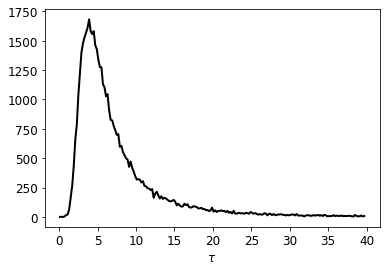

In [10]:
#draw posterior density of tau p(tau|y)
fig = plt.figure()
ax = fig.add_subplot(111)
taugrid = np.arange(0,40,0.2)
taucenter = (taugrid[:-1]+taugrid[1:])/2.0
htau,xedge = np.histogram(tau_d, bins=taugrid)
ax.plot(taucenter,htau,'k',linewidth=2)
ax.set_xlabel(r'$\tau$',fontsize=12)
# fig.show()

Text(0.5, 0, '$\\mu$')

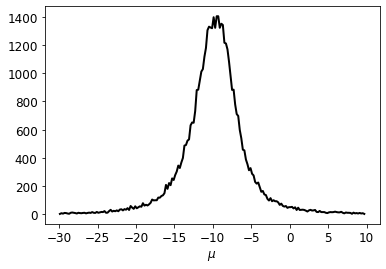

In [11]:
#draw posterior density of mu p(mu|tau,y)
fig = plt.figure()
ax = fig.add_subplot(111)
mugrid = np.arange(-30,10,0.2)
mucenter = (mugrid[:-1]+mugrid[1:])/2.0
hmu,xedge = np.histogram(mu_d, bins=mugrid)
ax.plot(mucenter,hmu,'k',linewidth=2)
ax.set_xlabel(r'$\mu$',fontsize=12)
# fig.show()

Text(0, 0.5, '$\\tau$')

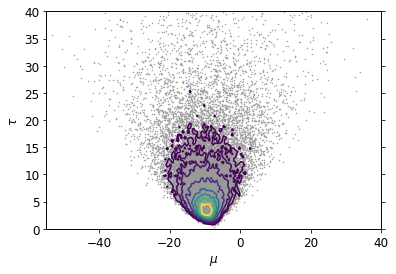

In [12]:
#draw joint posterior density of mu p(mu,tau|y)
taugrid2 = np.arange(0,40,0.5)
taucenter2 = (taugrid2[:-1]+taugrid2[1:])/2.0
mugrid2 = np.arange(-30,10,0.5)
mucenter2 = (mugrid2[:-1]+mugrid2[1:])/2.0
mumesh,taumesh = np.meshgrid(mucenter2, taucenter2)
mp,xedge,ydge = np.histogram2d(mu_d.reshape((N,)), \
        tau_d.reshape((N,)), bins=[mugrid2, taugrid2])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(mu_d,tau_d,'.',\
        markeredgecolor=[0.6,0.6,0.6],\
        markerfacecolor=[0.6,0.6,0.6],\
       markersize=1)
ax1 = ax.twinx()
ax1.contour(mumesh, taumesh, mp.T, \
    levels=np.array([5,10,20,50,100,150,200,300]))
ax1.set_xlim([-55,40])
ax1.set_ylim([0,40])
ax1.set_yticklabels([])
ax.set_xlim([-55,40])
ax.set_ylim([0,40])

ax.set_xlabel(r'$\mu$',fontsize=12)
ax.set_ylabel(r'$\tau$',fontsize=12)
# fig.show()

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-13-ba0bfe35bee2>:30: RuntimeWarning: invalid value encountered in double_scalars
  D_theta_delta[t] = np.sum((theta_delta[ind]-\
<ipython-input-13-ba0bfe35bee2>:32: RuntimeWarning: invalid value encountered in double_scalars
  D_theta_gamma[t] = np.sum((theta_gamma[ind]-\
<ipython-input-13-ba0bfe35bee2>:34: RuntimeWarning: invalid value encountered in double_scalars
  D_theta_beta[t] = np.sum((theta_beta[ind]-\
<ipython-input-13-ba0bfe35bee2>:36: RuntimeWarning: invalid value encountered in double_scalars
  D_theta_alpha[t] = np.sum((theta_alpha[ind]-\


Text(0, 0.5, '$std(\\theta_j|\\mu,\\tau,\\bar{y_{\\cdot j}}$)')

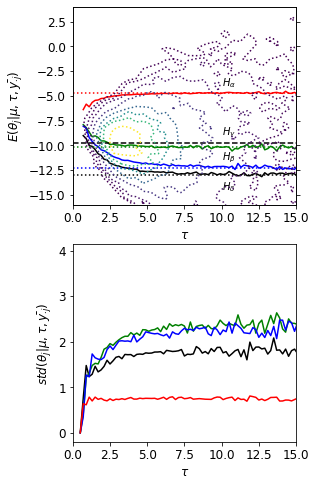

In [13]:
#sample theta_j from p(theta_j|mu,tau,y)
def draw_post_theta_j(mu,tau,y_bar_j,sigma2_j):
    V_j = 1/(1/sigma2_j+1/tau**2)
    theta_j_hat = (y_bar_j/sigma2_j+mu/tau**2)*V_j
    theta_j = np.random.normal(theta_j_hat, np.sqrt(V_j))
    return theta_j

theta_delta = draw_post_theta_j(mu_d,tau_d,y_bar[0],sigma2[0])
theta_gamma = draw_post_theta_j(mu_d,tau_d,y_bar[1],sigma2[1])
theta_beta = draw_post_theta_j(mu_d,tau_d,y_bar[2],sigma2[2])
theta_alpha = draw_post_theta_j(mu_d,tau_d,y_bar[3],sigma2[3])

E_theta_delta = np.zeros(np.shape(taucenter))
E_theta_gamma = np.zeros(np.shape(taucenter))
E_theta_beta = np.zeros(np.shape(taucenter))
E_theta_alpha = np.zeros(np.shape(taucenter))

D_theta_delta = np.zeros(np.shape(taucenter))
D_theta_gamma = np.zeros(np.shape(taucenter))
D_theta_beta = np.zeros(np.shape(taucenter))
D_theta_alpha = np.zeros(np.shape(taucenter))

for t in range(len(taucenter)):
    ind = (tau_d>taugrid[t]) & (tau_d<=taugrid[t+1])
    E_theta_delta[t] = np.mean(theta_delta[ind])
    E_theta_gamma[t] = np.mean(theta_gamma[ind])
    E_theta_beta[t] = np.mean(theta_beta[ind])
    E_theta_alpha[t] = np.mean(theta_alpha[ind])
    
    D_theta_delta[t] = np.sum((theta_delta[ind]-\
        E_theta_delta[t])**2)/(np.sum(ind)-1)
    D_theta_gamma[t] = np.sum((theta_gamma[ind]-\
        E_theta_gamma[t])**2)/(np.sum(ind)-1)
    D_theta_beta[t] = np.sum((theta_beta[ind]-\
        E_theta_beta[t])**2)/(np.sum(ind)-1)
    D_theta_alpha[t] = np.sum((theta_alpha[ind]-\
        E_theta_alpha[t])**2)/(np.sum(ind)-1)

taumesh,mumesh = np.meshgrid(taucenter2, mucenter2)
mp,xedge,ydge = np.histogram2d(tau_d.reshape((N,)), \
        mu_d.reshape((N,)), bins=[taugrid2, mugrid2])
fig = plt.figure(figsize=[4,8])
#mean_theta as a function of tau
ax = fig.add_subplot(211)
ax.plot(taucenter, E_theta_delta, 'k-')
ax.plot(taucenter, E_theta_gamma, 'g-')
ax.plot(taucenter, E_theta_beta, 'b-')
ax.plot(taucenter, E_theta_alpha, 'r-')
ax.plot([0,40], [y_bar[0],y_bar[0]], 'k:')
ax.plot([0,40], [y_bar[1],y_bar[1]], 'g:')
ax.plot([0,40], [y_bar[2],y_bar[2]], 'b:')
ax.plot([0,40], [y_bar[3],y_bar[3]], 'r:')
ax.plot([0,40],[np.mean(mu_d),np.mean(mu_d)],'k--')
ax1 = ax.twinx()
ax1.contour(taumesh,mumesh, mp.T, \
    levels=np.array([5,10,20,50,100,150,200,300]),\
           linestyles='dotted')
ax.text(10,-4,r'$H_\alpha$',fontsize=10)
ax.text(10,-9,r'$H_\gamma$',fontsize=10)
ax.text(10,-11.5,r'$H_\beta$',fontsize=10)
ax.text(10,-14.5,r'$H_\delta$',fontsize=10)
ax1.set_xlim([0,15])
ax1.set_ylim([-16,4])
ax1.set_yticklabels([])
ax.set_xlim([0,15])
ax.set_ylim([-16,4])
ax.set_xlabel(r'$\tau$',fontsize=12)
ax.set_ylabel(r'$E(\theta_j|\mu,\tau,\bar{y_{\cdot j}}$)',\
              fontsize=12)

#std. deviation of theta as a function of tau
ax = fig.add_subplot(212)
ax.plot(taucenter, np.sqrt(D_theta_delta), 'k-')
ax.plot(taucenter, np.sqrt(D_theta_gamma), 'g-')
ax.plot(taucenter, np.sqrt(D_theta_beta), 'b-')
ax.plot(taucenter, np.sqrt(D_theta_alpha), 'r-')

ax.set_xlim([0,15])
ax.set_xlabel(r'$\tau$',fontsize=12)
ax.set_ylabel(r'$std(\theta_j|\mu,\tau,\bar{y_{\cdot j}}$)',\
              fontsize=12)
# fig.show()